#  Automobile_Analysis

[Prashant Brahmbhatt](https://github.com/hashbanger)

In [376]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

sns.set_style('darkgrid')

In [377]:
df = pd.read_csv('Automobile price data _Raw_.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

We can observe that many of the data type are object, which denotes strings most likely.

## Checking for Missing Values

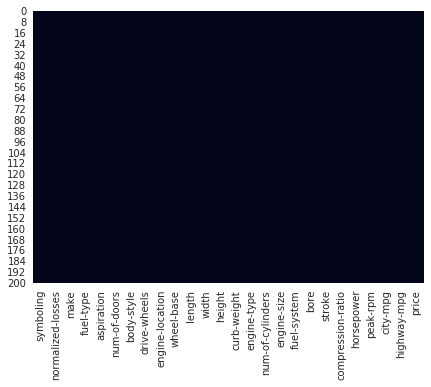

In [379]:
plt.figure(figsize=(7,5))
sns.heatmap(df.isna(), cbar = False)
plt.show()

Initially there doesn't seem to be any missing values. Let's have a closer look.

Printing the unique values for each column

In [380]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print()

symboling
[ 3  1  2  0 -1 -2]

normalized-losses
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']

make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

fuel-type
['gas' 'diesel']

aspiration
['std' 'turbo']

num-of-doors
['two' 'four' '?']

body-style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drive-wheels
['rwd' 'fwd' '4wd']

engine-location
['front' 'rear']

wheel-base
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  

Now we can observe that there is presence of a **?** in many of the columns which is most likely an indicator of missing or unknown values. 
So let us convert all the ?

The columns having **?** are **normalized-losses**, **num-of-doors**, **stroke**, **horsepower**, **bore**,  **peak-rpm**, **price**

Now we can observe that there are missing values in 7  columns.

### Handling Missing Values

We are not going to straightaway start filling those or dropping those in.   
We should observe how much missing values are present and what would be wise thing to do.  
Filling large amount of missing values would make the data biased.  

In [381]:
for col in df.columns:
    if '?' in df[col].unique():
            print("Percentage of missing values in {} is {:.2f}".format( col, sum(df[col] == '?') / len(df[col]) * 100))

Percentage of missing values in normalized-losses is 20.00
Percentage of missing values in num-of-doors is 0.98
Percentage of missing values in bore is 1.95
Percentage of missing values in stroke is 1.95
Percentage of missing values in horsepower is 0.98
Percentage of missing values in peak-rpm is 0.98
Percentage of missing values in price is 1.95


Since not many of the columns have extraordinarily high amount of missing values. We can try imputing with appropriate technique.

## Conversion to Correct Data types and Imputing

Let us take a look at the distributions of the columns having missing values.

### Imputing

- **For columns which have outliers we will impute with median**  
- **else we will imputing with mean**

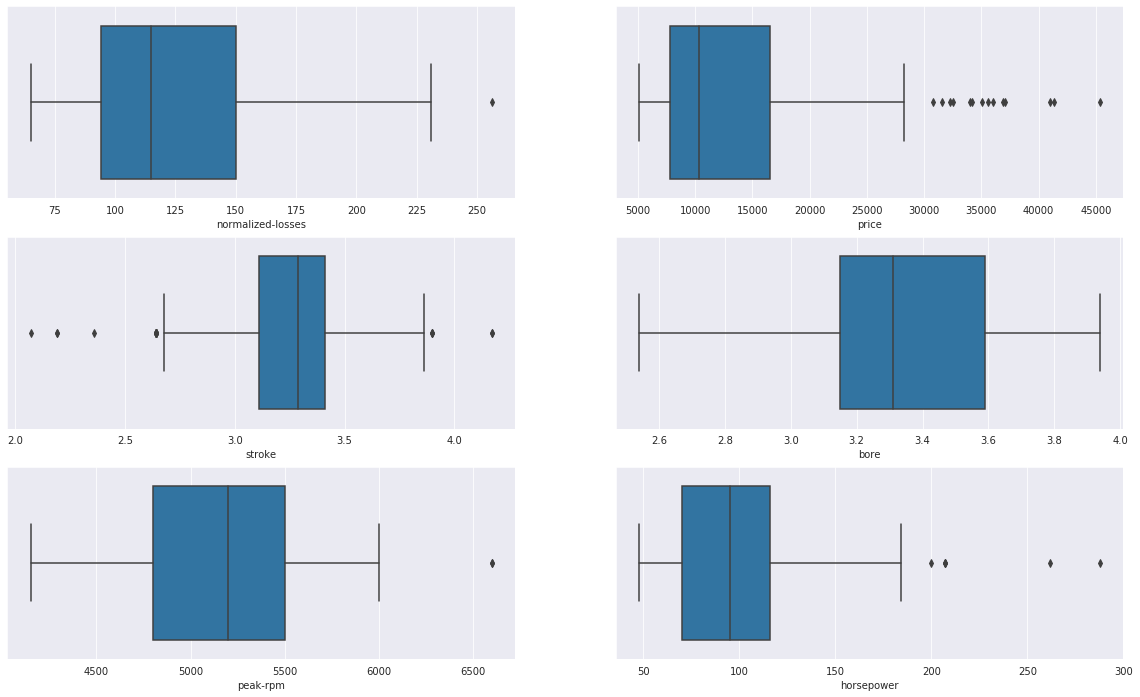

In [382]:
plt.figure(figsize=(20,12))
plt.subplot(3,2,1)
sns.boxplot(df[df['normalized-losses'] != '?']['normalized-losses'].astype('int'))
plt.subplot(3,2,2)
sns.boxplot(df[df['price'] != '?']['price'].astype('int'))
plt.subplot(3,2,3)
sns.boxplot(df[df['stroke'] != '?']['stroke'].astype('float'))
plt.subplot(3,2,4)
sns.boxplot(df[df['bore'] != '?']['bore'].astype('float'))
plt.subplot(3,2,5)
sns.boxplot(df[df['peak-rpm'] != '?']['peak-rpm'].astype('float'))
plt.subplot(3,2,6)
sns.boxplot(df[df['horsepower'] != '?']['horsepower'].astype('float'))

plt.show()

Now imputing

In [383]:
mean_ = df[df['normalized-losses'] != '?']['normalized-losses'].astype('int').mean()
df['normalized-losses'] = df['normalized-losses'].replace('?', mean_).astype('int')

median_ = df[df['price'] != '?']['price'].astype('int').median()
df['price'] = df['price'].replace('?', median_).astype('int')

median_ = df[df['stroke'] != '?']['stroke'].astype('float').median()
df['stroke'] = df['stroke'].replace('?', median_).astype('float')

mean_ = df[df['bore'] != '?']['bore'].astype('float').mean()
df['bore'] = df['bore'].replace('?', mean_).astype('float')

mean_ = df[df['peak-rpm'] != '?']['peak-rpm'].astype('int').mean()
df['peak-rpm'] = df['peak-rpm'].replace('?', mean_).astype('int')

median_ = df[df['horsepower'] != '?']['horsepower'].astype('int').median()
df['horsepower'] = df['horsepower'].replace('?', median_).astype('int')

#### We still have one column left, that is 'num-of-doors',

In [384]:
df[df['num-of-doors'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,122,mazda,diesel,std,?,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


So we can see there are 2 missing values.  
We can fill these on the basis of the brand and the body style which should get us the most likely answer.

In [385]:
df.loc[df['make'] == 'dodge'][df.loc[df['make'] == 'dodge']['body-style'] == 'sedan']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
25,1,148,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692
26,1,148,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,7609
27,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558


In [386]:
df.loc[df['make'] == 'mazda'][df.loc[df['make'] == 'mazda']['body-style'] == 'sedan']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
53,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6695
54,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395
60,0,115,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8495
62,0,115,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10245
63,0,122,mazda,diesel,std,?,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795
65,0,118,mazda,gas,std,four,sedan,rwd,front,104.9,...,140,mpfi,3.76,3.16,8.0,120,5000,19,27,18280
66,0,122,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72,4200,31,39,18344


In both cases, 'four' seems the suitable choice. As per branch being mazda, dodge, and body being sedan.

In [387]:
df['num-of-doors'].replace('?', 'four', inplace= True)

___________________________________________________________________